# open parcels run and plot info

In [1]:
import os, shutil
import xarray as xr

from time import sleep
from datetime import datetime
from IPython.display import clear_output

import mitequinox.parcels as pa

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.3420765.datarmor0/parcels-55081/libparcels_random_ac38c7f4-6bfe-4a65-ab9d-76e3511c1169.so


In [2]:
#root_dir = '/home1/scratch/aponte/parcels/'
root_dir = '/home1/datawork/aponte/parcels/'
#root_dir = '/home1/datawork/slgentil/parcels/'

# 5x5 tiles dij=100 T=365 5jobs x 5workers
#run_name = 'global_T365j_dt1j_dij50'
#run_name = 'debug'
run_name = 'global_extra_T365j_dt1j_dij50'

In [3]:
ds, dirs = pa.load_logs(root_dir, run_name)

In [4]:
#ds.sel(step=slice(172, None)).global_parcel_number.plot()

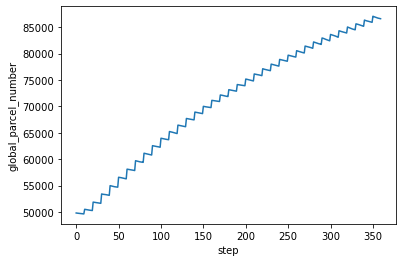

In [5]:
ds.global_parcel_number.plot()

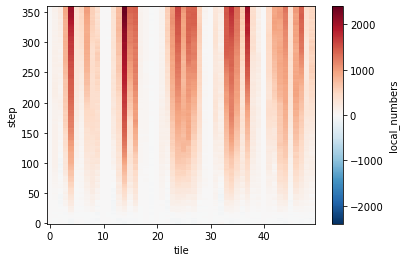

In [6]:
(ds.local_numbers - ds.local_numbers.sel(step=10)).plot()

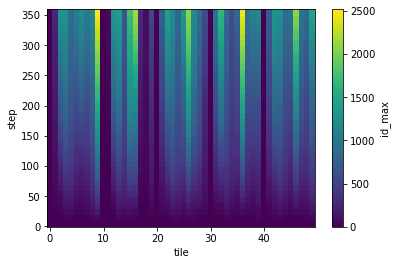

In [7]:
(ds.id_max - ds.id_max.sel(step=0)).plot()

In [8]:
def print_status(ds, delta_step=10):

    max_step = int(max(ds.step))

    print(datetime.now())
    
    for i in range(delta_step):
        step = max_step-delta_step+i
        global_previous = int(ds.global_parcel_number.sel(step=step-1))
        global_number = int(ds.global_parcel_number.sel(step=step))
        print('-- step {}'.format(step))
        print('Total number of particles = {}  ({:+d})'
          .format(global_number, 
                  global_number-global_previous,
                 )
         )

In [9]:
while True:
    
    clear_output(wait=True)
    
    ds = pa.load_logs(root_dir, run_name)
    print_status(ds)
    
    sleep(60*5)

2021-03-03 18:55:33.336116
-- step 349
Total number of particles = 85905  (-37)
-- step 350
Total number of particles = 87056  (+1151)
-- step 351
Total number of particles = 86983  (-73)
-- step 352
Total number of particles = 86935  (-48)
-- step 353
Total number of particles = 86869  (-66)
-- step 354
Total number of particles = 86812  (-57)
-- step 355
Total number of particles = 86745  (-67)
-- step 356
Total number of particles = 86699  (-46)
-- step 357
Total number of particles = 86665  (-34)
-- step 358
Total number of particles = 86619  (-46)


KeyboardInterrupt: 